# Esercizio 6
## Esercizio 6.1

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Equilibrazione


Una volta verificata la plausibilità dei risultati provo a fare lo script per automatizzare la creazione di tutti i file che mi serviranno per creare i grafici per confrontare le simulazioni con i risultati esatti. 
Per poter fare ciò scrivo una funzione che crea i file con i dati dell'ultimo blocco per ogni simulazione di temperatura. 
## INSERIRE GRAFICO EQUILIBRAZIONE


## Simulation with the Metropolis algorithm

Per fare questo ho usato l'algoritmo di Metropolis già implementato. 
Ho implementato il calcolo di magnetizzazione secondo la formula, nella funzione measure. Il calcolo di Chi, nella funzione measure. Il calcolo di C_v è parzialmente implementato in measure e parte in average in quanto mi serviva il valor medio di H che è pronto per essere usato solamente quando la variaibile di accumulazione è completa. 

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/759201135.py:28: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('susceptibility ($\chi$)')
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/759201135.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/chi.dat', header=None, delim_whitespace=True)


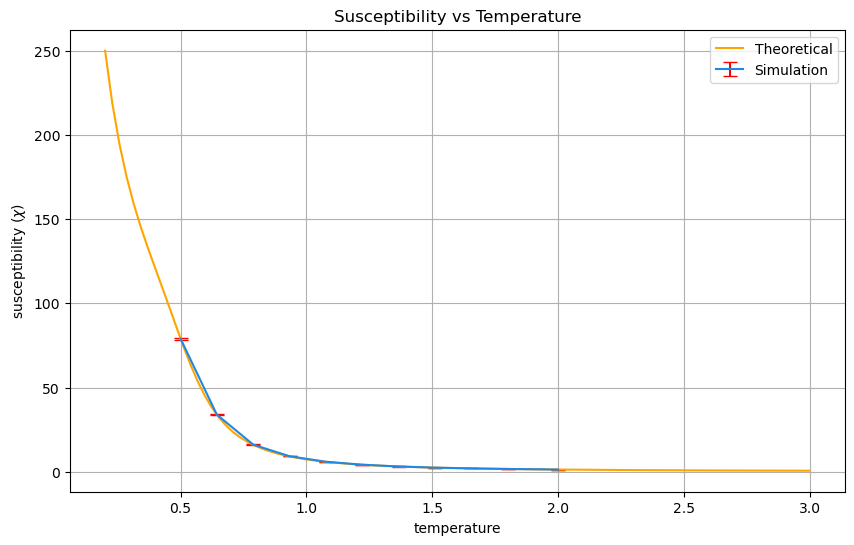

In [30]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/chi.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5, label='Simulation')
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
# Calculate theoretical susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# Plot the theoretical curve
plt.plot(T, X, label='Theoretical', color='orange')

# Add labels, title, legend, and grid
plt.xlabel('temperature')
plt.ylabel('susceptibility ($\chi$)')
plt.title('Susceptibility vs Temperature')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/1892558520.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/tenergy.dat', header=None, delim_whitespace=True)


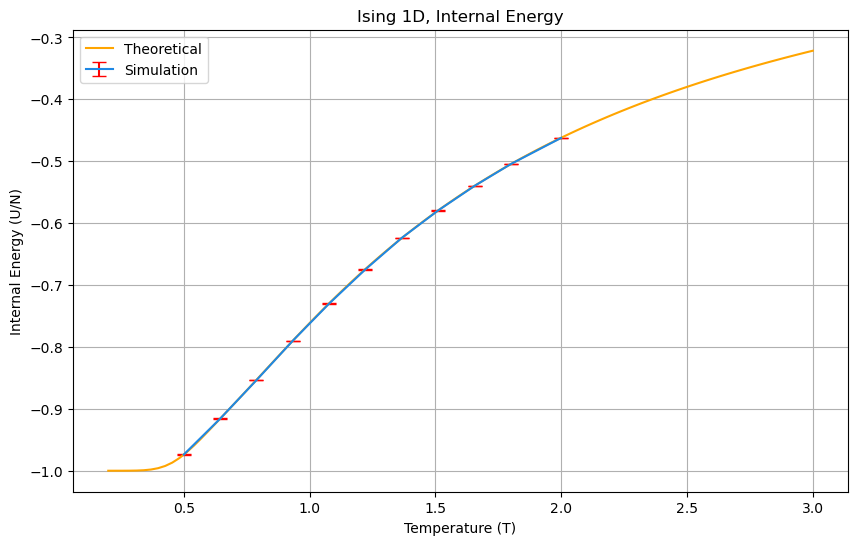

In [31]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/tenergy.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5, label='Simulation')

# Calculate theoretical internal energy
e = -J * (th + ch * thN) / (1 + thN)

# Plot the theoretical curve
plt.plot(T, e, label='Theoretical', color='orange')

# Add labels, title, legend, and grid
plt.title('Ising 1D, Internal Energy')
plt.xlabel('Temperature (T)')
plt.ylabel('Internal Energy (U/N)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/128647292.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/cv.dat', header=None, delim_whitespace=True)


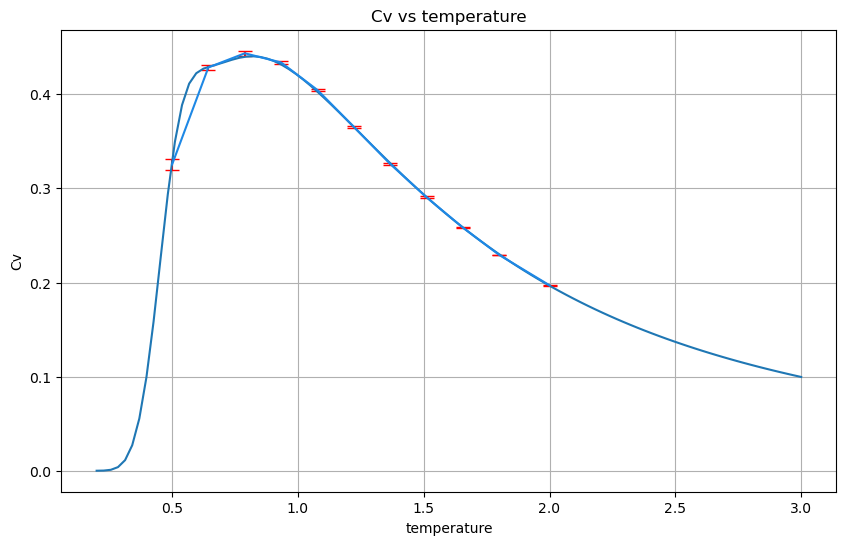

In [27]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/cv.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5)
plt.plot(T, heat)
plt.xlabel('temperature')
plt.ylabel('Cv')
plt.title('Cv vs temperature')
plt.grid(True)
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/2415850334.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_H/METROPOLIS/magnet.dat', header=None, delim_whitespace=True)


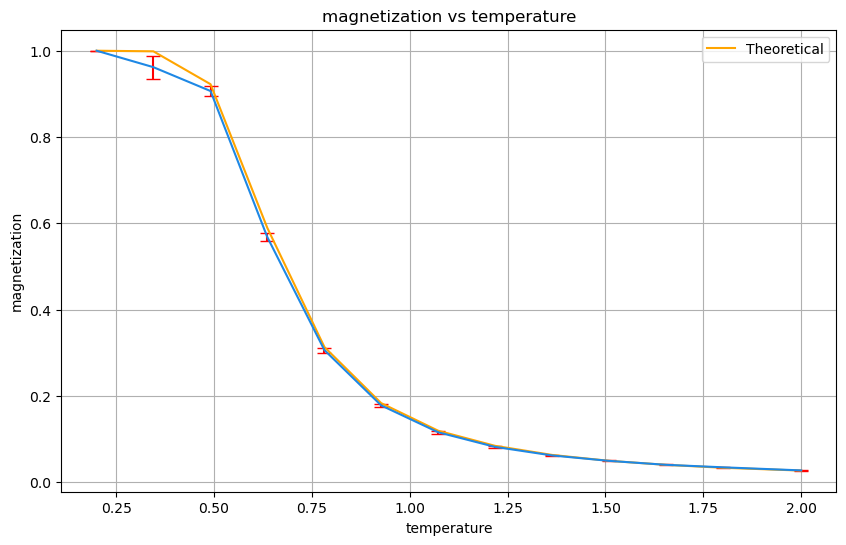

In [28]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_H/METROPOLIS/magnet.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5)
plt.xlabel('temperature')
plt.ylabel('magnetization')
plt.title('magnetization vs temperature')
plt.grid(True)
# Define constants
J = 1  # Interaction constant
Ns = 100  # Number of spins
h = 0.02

# Calculate theoretical values
T = x  # Use the x values (temperature) from the data
b = 1 / T

l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))
l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))
Z = l1 ** Ns + l2 ** Ns
M = (np.exp(b * J) * np.sinh(b * h) * ((l1 ** (Ns - 1)) * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))) +
    (l2 ** (Ns - 1)) * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))))) / Z

# Plot the theoretical curve
plt.plot(T, M, label='Theoretical', color='orange')

# Add legend and show the plot
plt.legend()
plt.show()

## Simulation with Gibbs Algorithm

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/2760184782.py:28: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('susceptibility ($\chi$)')
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/2760184782.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/chi.dat', header=None, delim_whitespace=True)


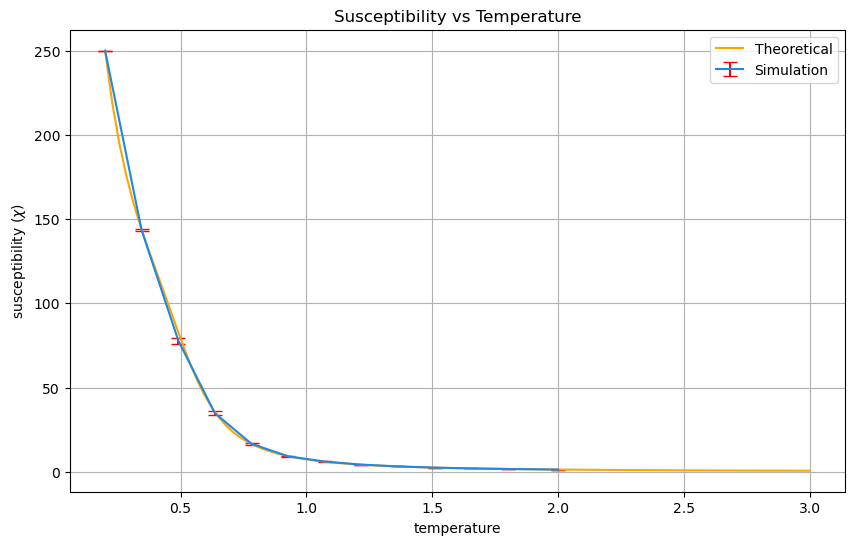

In [33]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/chi.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5, label='Simulation')
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
# Calculate theoretical susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# Plot the theoretical curve
plt.plot(T, X, label='Theoretical', color='orange')

# Add labels, title, legend, and grid
plt.xlabel('temperature')
plt.ylabel('susceptibility ($\chi$)')
plt.title('Susceptibility vs Temperature')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/842691833.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/tenergy.dat', header=None, skiprows=1, delim_whitespace=True)


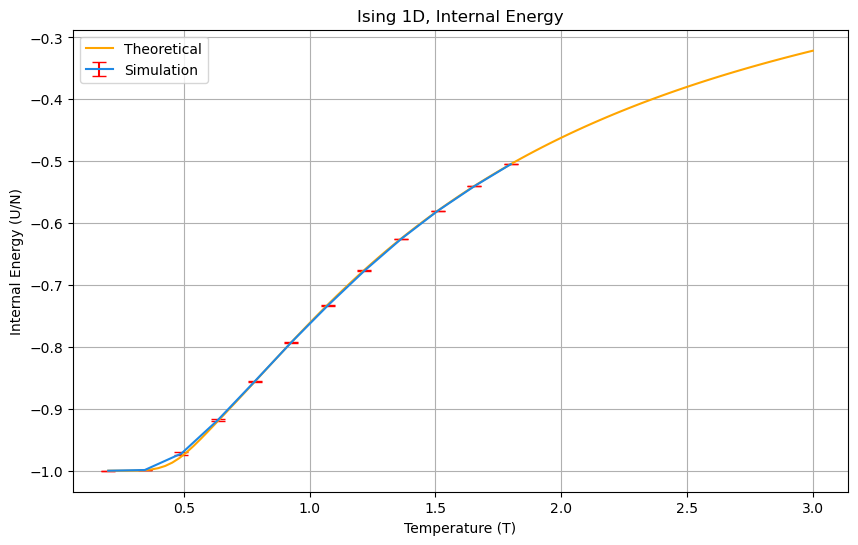

In [34]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/tenergy.dat', header=None, skiprows=1, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5, label='Simulation')

# Calculate theoretical internal energy
e = -J * (th + ch * thN) / (1 + thN)

# Plot the theoretical curve
plt.plot(T, e, label='Theoretical', color='orange')

# Add labels, title, legend, and grid
plt.title('Ising 1D, Internal Energy')
plt.xlabel('Temperature (T)')
plt.ylabel('Internal Energy (U/N)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/2342456957.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/cv.dat', header=None, delim_whitespace=True)


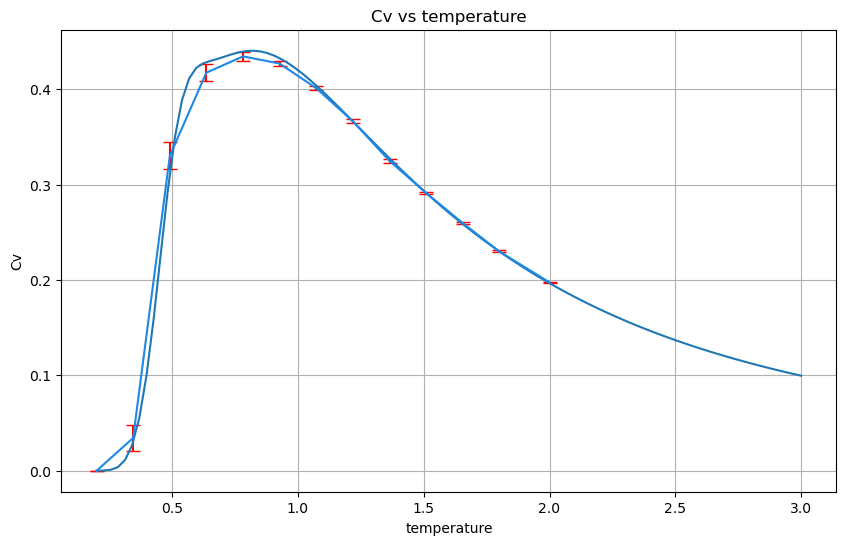

In [35]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/cv.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5)
plt.plot(T, heat)
plt.xlabel('temperature')
plt.ylabel('Cv')
plt.title('Cv vs temperature')
plt.grid(True)
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6395/3821624315.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_H/GIBBS/magnet.dat', header=None, delim_whitespace=True)


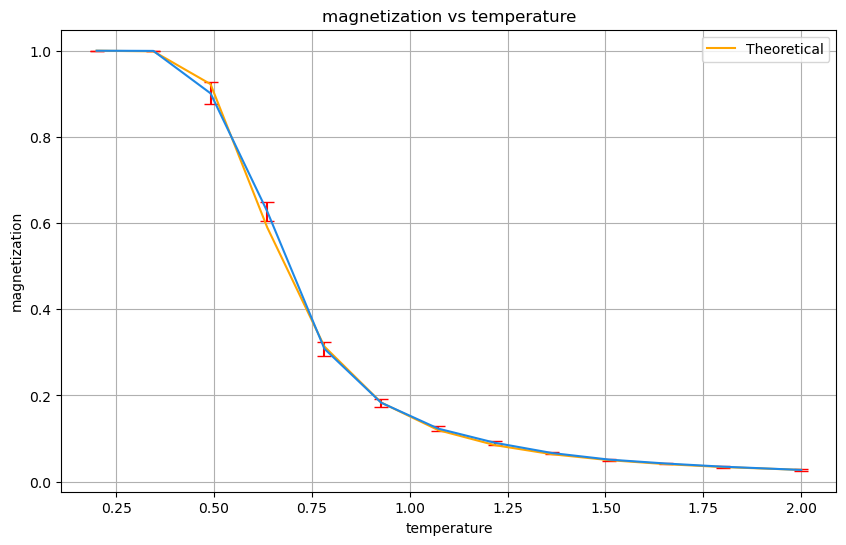

In [36]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_H/GIBBS/magnet.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5)
plt.xlabel('temperature')
plt.ylabel('magnetization')
plt.title('magnetization vs temperature')
plt.grid(True)
# Define constants
J = 1  # Interaction constant
Ns = 100  # Number of spins
h = 0.02

# Calculate theoretical values
T = x  # Use the x values (temperature) from the data
b = 1 / T

l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))
l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))
Z = l1 ** Ns + l2 ** Ns
M = (np.exp(b * J) * np.sinh(b * h) * ((l1 ** (Ns - 1)) * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))) +
    (l2 ** (Ns - 1)) * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))))) / Z

# Plot the theoretical curve
plt.plot(T, M, label='Theoretical', color='orange')

# Add legend and show the plot
plt.legend()
plt.show()